## Cálculo II## 

En esta práctica veremos algunas herramientas de SAGE que te pueden ayudar a entender las funciones $f:\mathbb{R}^N\to\mathbb{R}^M$ que estás estudiando en Cálculo II. Además de aprender a calcular derivadas parciales, gradientes, jacobianos, hessianos, etc., veremos cómo representar curvas en el plano y en el espacio, y superficies en el espacio. Concretamente, veremos cómo representar:

- Curvas planas dadas en forma paramétrica.
- Curvas planas dadas en coordenadas polares.
- Curvas planas dadas en forma implícita.
- Curvas de nivel de una función de dos variables.
- Curvas en el espacio tridimensional dadas en forma paramétrica. 
- Superficies de nivel de una función de tres variables.
- Superficies dadas en forma paramétrica.

**Parte 1. Curvas parametrizadas en el plano.** 

Consideramos curvas parametrizadas en el plano, $(x(t),y(t))$, con $t \in (a,b)$. Por ejemplo, si
$$x(t)= \cos (t) , \, y(t)= \hbox{sen}(t),\quad \text{con } t \in (0, \pi),$$
estaremos representando la mitad superior de la circunferencia unidad. Podemos entender la curva como la trayectoria de un objeto y $t$ como la variable tiempo. La derivada respecto a $t$ es el vector velocidad en el instante $t$.

Veamos como manejar estas funciones de una variable con valores en $\mathbb{R}^2$ con un ejemplo. 

In [1]:
var('t')
r(t)=(cos(t), sin(t))
r

t |--> (cos(t), sin(t))

In [2]:
r(pi/4)

(1/2*sqrt(2), 1/2*sqrt(2))

In [3]:
velocidad=r.diff(t) # velocidad=diff(r,t) hace exactamente lo mismo
velocidad

t |--> (-sin(t), cos(t))

In [12]:
velocidad(1)

(-sin(1), cos(1))

In [13]:
T=velocidad/velocidad.norm() #El vector velocidad "normalizado" (es decir, de norma 1)
#(dividir entre su norma la hace de norma 1)
T(1).n()

(-0.841470984807897, 0.540302305868140)

In [14]:
N(T(1)[0]^2+T(1)[1]^2)

1.00000000000000

La instrucción de SAGE para representar este tipo de curvas es el comando *parametric_plot*.

**Ejercicio 1.-** Usa la ayuda de Sage ver cómo funciona este comando, y representa el ejemplo anterior, la circunferencia (completa) de radio 5 y otras curvas (elegidas por ti) dadas en forma paramétrica.

Busca en la red las ecuaciones paramétricas de las siguientes curvas: cicloide, cardioide, astroide, tractriz,  y **haz las representaciones gráficas respectivas**.

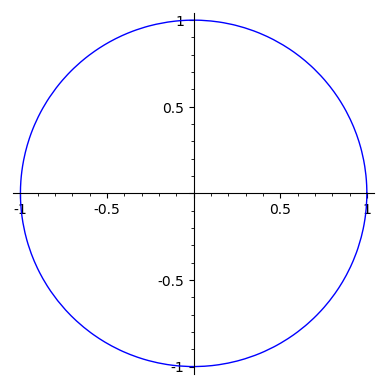

In [18]:
parametric_plot(r,(t,0,2*pi))

Podemos utilizar la parametrización de una curva y su _velocidad_ para ver cómo se _recorre_ al ir avanzando el valor de su parámetro en un intervalo. En la siguiente celda incluimos una manera de visualizar cómo se movería un punto sobre una cicloide cuando su parámetro varía entre $0$ y $6\pi$ (acompaña a cada punto el vector velocidad).

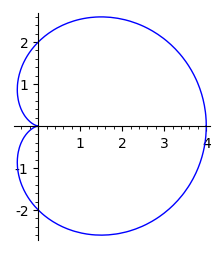

In [35]:
a = 2;
cardioide(t)=(a*(1+cos(t))*cos(t),a*(1+cos(t))*sin(t))
parametric_plot(cardioide,(t,0,2*pi)).show(figsize=4)#, axes=False)

Animation with 50 frames
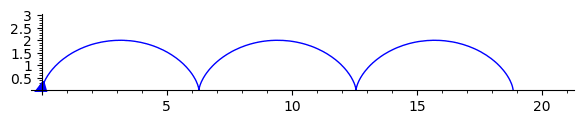

In [45]:
fotogramas,M,tmax = [],50,6*pi
cicloide(t) = (t-sin(t), 1-cos(t))
v_cicloide = cicloide.diff(t)
CICLOIDE = parametric_plot(cicloide, (t, 0, 6*pi))+line([(0,3),(tmax+2,3)],color='white')
for k in [1..M]:
    angulo = k/M*tmax
    p = cicloide(angulo)
    vel = v_cicloide(angulo)
    fotogramas+=[CICLOIDE+point(p)+arrow2d(p,p+vel)]
movie=animate(fotogramas)
movie.show()

Animation with 60 frames
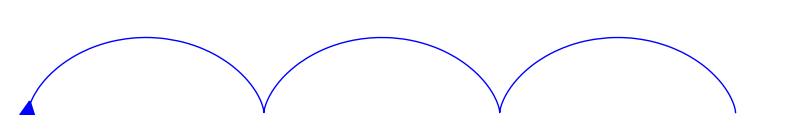

In [19]:
#CICLOIDE. PARAMÉTRICAS x=R*(t-sin(t)), y=R*(1-cos(t)), 
#DONDE R ES EL RADIO DE LA CIRCUNFERENCIA QUE GIRA
var('t')
R=1##Para la cicloide
cicloide(t)=(R*(t-sin(t)),R*(1-cos(t)))
V_cicloide=cicloide.diff(t)
Cicloide=parametric_plot(cicloide,(t,0,6*pi),axes=False)##Común a todos los fotogramas
Cicloide+=line([(0,2.6*R),(6.2*pi*R,2.6*R)],color='white',figsize=8)##Común, para evitar feos efectos por los cambios de tamaño
peli=[]
M=60##Número de fotogramas
for t0 in [1..M]:
    angulo=t0/M*6*pi
    punto=cicloide(angulo)
    velocidad=V_cicloide(angulo)
    peli.append(Cicloide+point(punto,pointsize=20)+arrow2d(punto,punto+velocidad))
movie=animate(peli)
movie.show(delay=16)

**Ejercicio 2.-** Haz animaciones análogas a la anterior que muestren cómo se _recorren_ algunas de las curvas que hayas considerado en el ejercicio 1. 

In [65]:
def dibujar(f,t,valmax, puntosblanco):
    '''función, variable, valor máximo, puntos para que no se mueva el dibujo'''
    var('t')
    V_=f.diff(t)
    DIB=line(puntosblanco,color='white',figsize=8)##Común, para evitar feos efectos por los cambios de tamaño
    DIB+=parametric_plot(f,(t,0,6*pi),axes=True)##Común a todos los fotogramas
    peli=[]
    M=40##Número de fotogramas
    for t0 in [1..M]:
        angulo=t0/M*6*pi
        punto=f(angulo)
        velocidad=V_(angulo)
        peli.append(DIB+point(punto,pointsize=20)+arrow2d(punto,punto+velocidad))
    movie=animate(peli)
    movie.show(delay=16)
    

Animation with 60 frames
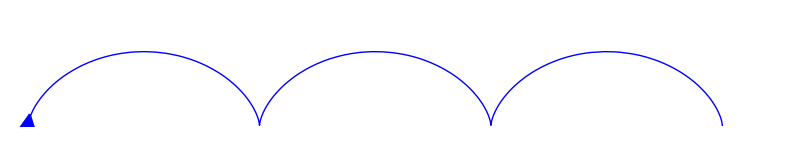

In [48]:
dibujar(cicloide, t, 6*pi, [(0,3),(6*pi+1,3)])

Animation with 40 frames
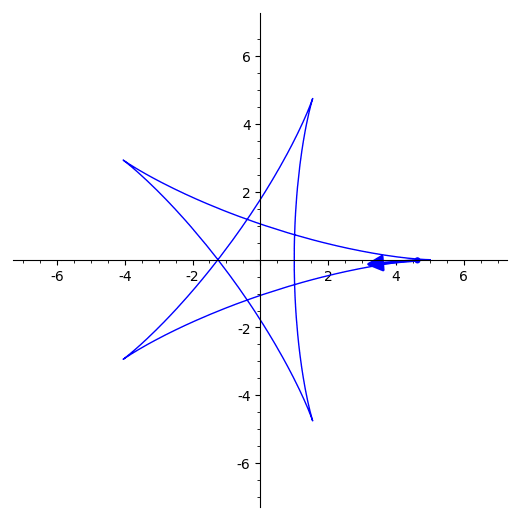

In [66]:
a,b=5,3
var('t')
hypocycloid(t) = ((a-b)*cos(t)+b*cos((a/b-1)*t),(a-b)*sin(t)-b*sin((a/b-1)*t))
dibujar(hypocycloid, t, 2*pi, [((a+2),(a+2)),(-(a+2),(a+2)),((a+2),-(a+2))])

Podemos calcular la longitud de arco de la curva parametrizada dada entre dos tiempos $t=a$ y $t=b$, integrando la norma de la velocidad.

Calculemos por ejemplo la longitud de la cardioide
$$
x(t)=4(1+ \cos t)\cos t,\quad y(t)=4(1+\cos t)\operatorname{sen}t,\qquad t\in [0,2\pi].
$$

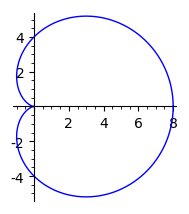

In [2]:
var('t')
a,b=0,2*pi
cardioide(t)=(4*(1+cos(t))*cos(t),4*(1+cos(t))*sin(t))
dib_cardioide=parametric_plot(cardioide,(t,a,b))
dib_cardioide.show(figsize=3)

In [3]:
velocidad_cardioide = cardioide.diff(t)
l_exacta=integrate(velocidad_cardioide.norm(),(t,a,b)).n()
l_exacta

32.0000000000000

También se puede calcular numéricamente. La sintaxis para *numerical_integral* es ligeramente no estándar -solo se ponen los extremos, no la variable

In [4]:
numerical_integral(velocidad_cardioide.norm(), a,b)

(32.0, 3.552713678800501e-13)

¿De dónde proviene la fórmula para la longitud de una curva? La idea es, siguiendo al gran Arquímedes, aproximarla por poligonales, cuya longitud se calcula de forma sencilla. Veámoslo en el ejemplo de la cardioide.

In [ ]:
M=10 #número de segmentos
poligonal=line([cardioide(a+j*(b-a)/M) for j in xsrange(M+1)], color='red')
(dib_cardioide+poligonal).show()

In [ ]:
laprox=[]
for M in xsrange(10,101): 
    long_aprox=sum([(cardioide(a+(j+1)*(b-a)/M)-cardioide(a+j*(b-a)/M)).norm() for j in xsrange(M)])
    laprox.append((M,long_aprox))
points(laprox)+line([(10,l_exacta),(100,l_exacta)],color='green')

**Ejercicio 3.-** Calcula las longitudes de alguna de las curvas parametrizadas que has representado en el ejercicio 1 por los tres procedimientos mencionados. 

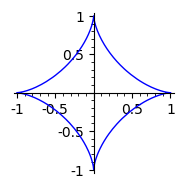

In [19]:
var('t')
a=1
astroid(t)=(a*cos(t)^3, a*sin(t)^3)
dib_astroid=parametric_plot(astroid, (t,0,2*pi))
dib_astroid.show(figsize = 3)
v_astroid = astroid.diff(t)
norma=v_astroid.norm()
#integrate(norma, (t,0,2*pi)).n()

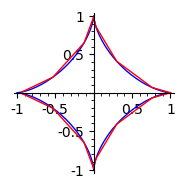

In [22]:
M=15 #número de segmentos
polig=line([(astroid(j/M*2*pi)) for j in range(M+1)], color='red')
(dib_astroid+polig).show(figsize=3)

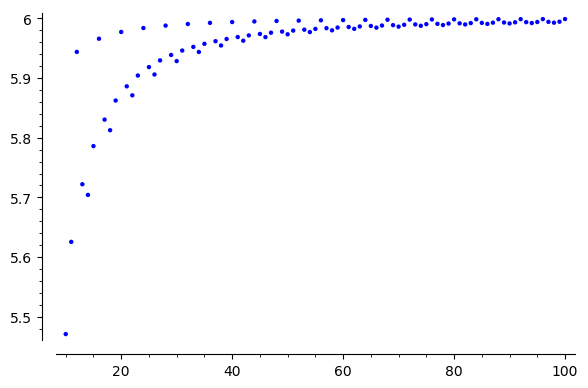

In [25]:
laprox=[]
for M in xsrange(10,101): 
    long_aprox=sum([(astroid((j+1)/M*2*pi)-astroid((j)/M*2*pi)).norm() for j in xsrange(M)])
    laprox.append((M,long_aprox))
points(laprox)

In [28]:
M=2000
points=[(astroid(j/M*2*pi)) for j in range(M+1)]
total=sum([(points[j]-points[j+1]).norm() for j in range(len(points)-1)])
total.n()

5.99999753265705

**Parte 2. Representación de una curva en coordenadas polares.** 

En ocasiones, es más cómodo expresar una curva mediante una ecuación del tipo $r=r(\theta)$ en coordenadas polares, $(r,\theta)$, donde $r$ es la distancia del punto en cuestión al origen y $\theta$ el ángulo que forman la recta que une el punto con el origen y el semieje $OX$ positivo. &nbsp; 

Por ejemplo, una manera muy simple de expresar la circunferencia unidad es&nbsp;$r(\theta)=1$ para $\theta\in [0, 2 \pi)$.

Es inmediato pasar de la forma polar a la forma paramétrica, escribiendo
$$(x(\theta), y(\theta))= (r(\theta)\cos(\theta), r(\theta)\operatorname{sen}(\theta)),$$
pero SAGE permite representar directamente curvas dadas en forma polar usando el comando *polar_plot*.

In [35]:
polar_plot?

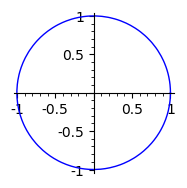

In [31]:
#Ejemplo 1: LA CIRCUNFERENCIA DE RADIO 1
polar_plot(1, (t, 0, 2*pi),figsize=3)

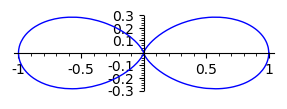

In [32]:
#Ejemplo 2 
polar_plot(cos(t)^4, (t, 0, 2*pi),figsize=3)

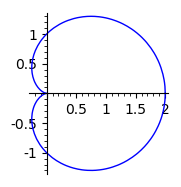

In [33]:
#Ejemplo 3 (Cardioide)
polar_plot(1+cos(t),(t,0,2*pi),figsize=3)

**Ejercicio 4 .-** Usa el comando de representación de curvas en polares para dibujar varias curvas elegidas por ti. Intenta que alguna de las curvas que dibujes tenga forma de espiral.



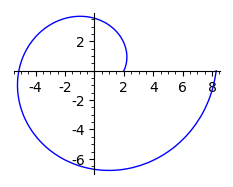

In [36]:
polar_plot(t+2,(t,0,2*pi),figsize=3)

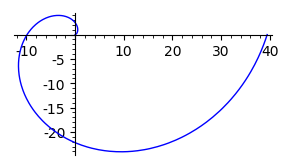

In [40]:
polar_plot(t^2,(t,0,2*pi),figsize=3)

**Parte 3. Curvas dadas por una ecuación implícita.** 

En otras ocasiones, las curvas vienen dadas por una ecuación implícita $ F(x,y)=cte$. Por ejemplo, $x^2 + y^2 = R^2 $ es la ecuación de la circunferencia de radio $R$ centrada en el origen.

El comando de SAGE para representar este tipo de curvas es *implicit_plot*.

In [ ]:
implicit_plot?

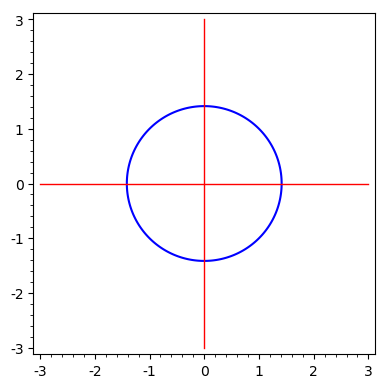

In [43]:
# Ejemplo: la circunferencia
var('x y')
implicit_plot(x^2+y^2-2, (x,-2,2), (y,-2,2))+line([(-3,0),(3,0)],color='red')+line([(0,-3),(0,3)],color='red')

**Ejercicio 5.-** Representa varias curvas (elegidas por ti) dadas implícitamente (**una de ellas puede ser una hipérbola**).

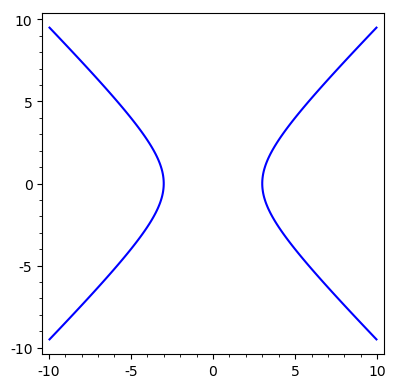

In [44]:
var('xy')
implicit_plot(x^2-y^2-9,(x,-10,10),(y,-10,10))

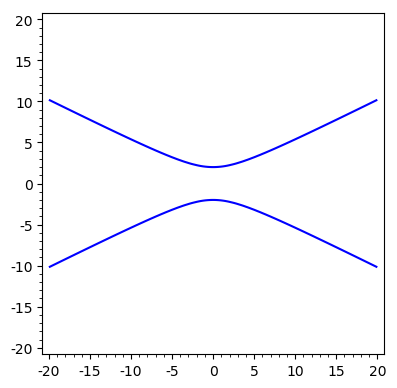

In [54]:
var('xy')
implicit_plot(x^2/16-y^2/4+1,(x,-20,20),(y,-20,20))

**Ejercicio 6.-** Busca las expresiones de algunas curvas de la geometría clásica: espiral de Arquímedes, espiral logarítmica, lemniscata, cisoide, catenaria, cicloide... y represéntalas usando el comando apropiado en cada caso.

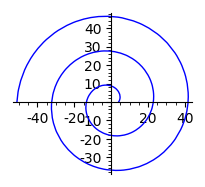

In [56]:
#espiral de arquímedes:
polar_plot(4+3*t, (t,0,5*pi), figsize=3)

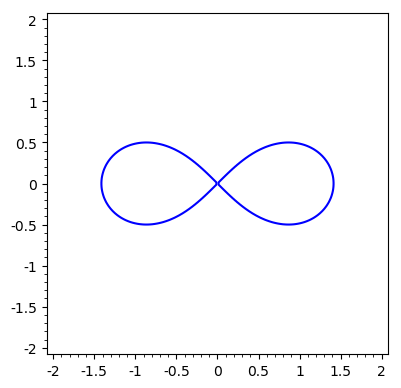

In [60]:
#lemniscata de Bernoulli
var('xy')
a=1
implicit_plot((x^2+y^2)^2-2*a^2*(x^2-y^2),(x,-2,2),(y,-2,2))

**Parte 4. Representación de conjuntos de nivel de una función de dos variables.**

Podemos resolver este problema de varias maneras:

- Usar un bucle *for*, junto con la instrucción *implicit_plot* (podemos añadir la opción de jugar con los colores, para cambiar el color de la curva $ F(x,y)=k $ dependiendo del valor de $k$.)
- Usar la opción *contours=* en el comando *implicit_plot* para que dibuje automáticamente el número que le indiquemos de conjuntos de nivel. 
- Usar la ayuda de Sage para ver las distintas opciones de la instrucción *contour_plot*. Dibujar los conjuntos de nivel de $ F(x,y)=x^2-y^2$, experimentando varias de las opciones que ofrece esta instrucción.

** COMENTARIO SOBRE EL INICIO DE LISTAS DE GRÁFICOS:**
Recordad que para iniciar variables con gráficos que luego se van a ir rellenando al pasar por un bucle, podemos utilizar la opción Graphics(). Es lo mismo que iniciar una lista vacía, cuando escribimos lista=[]

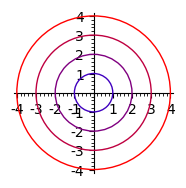

In [61]:
dibujo=Graphics()
for k in [1..4]:
    dibujo+=circle((0,0),k,color=[k/4,0,1-(k/4)])
dibujo.show(figsize=3)

**Ejercicio 7.-** Dibuja los conjuntos de nivel de $F(x,y)=x^2-y^2$ de cada una de las tres maneras anteriores (experimenta con algunas de las opciones que ofrece, en particular, el comando *contour_plot*).

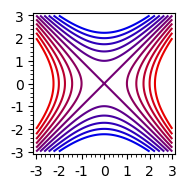

In [69]:
dibujo=Graphics()
for k in [-5..5]:
    dibujo+=implicit_plot((x^2-y^2==k),(x,-3,3),(y,-3,3),color=[(5+k)/11,0,((5-k)/11)])
dibujo.show(figsize=3)

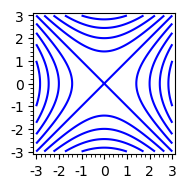

In [71]:
implicit_plot(x^2-y^2, (x,-3,3),(y,-3,3), contours=10, figsize=3)

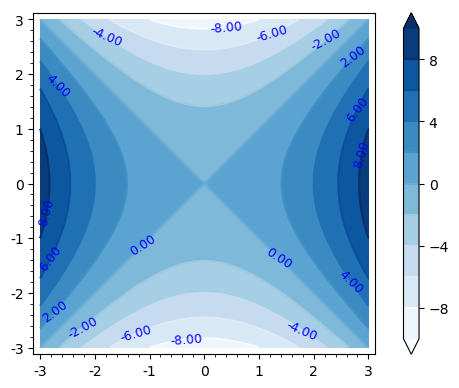

In [77]:
contour_plot(x^2-y^2, (x,-3,3),(y,-3,3), cmap = 'Blues',contours=10, colorbar=True, labels=True)

**Ejercicio 8.-** Usa la ayuda de Sage para ver las distintas opciones de la instrucción *region_plot*. Utilízalo en algún ejemplo (que puedes elegir).

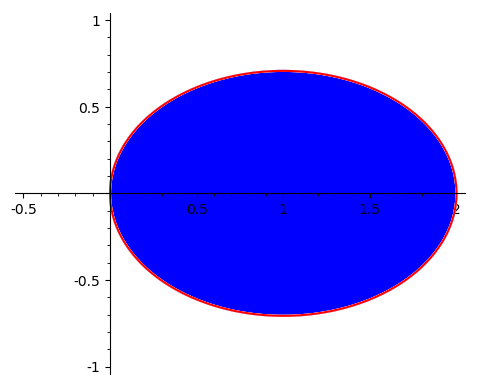

In [79]:
region_plot((x-1)^2+2*y^2<1, (x,-.5,2),(y,-1,1),bordercol='red', aspect_ratio=1)

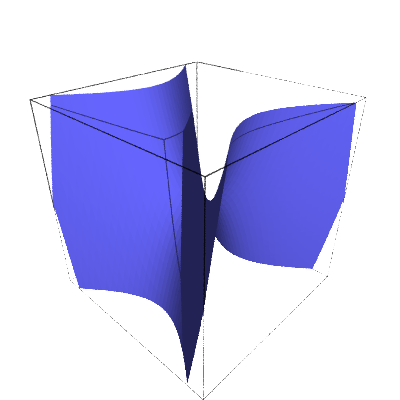

In [98]:
var('x y z')
fig=implicit_plot3d(x^2-y^2-z, (x,-3,3),(y,-3,3),(z,-3,3),viewer='tachyon')
fig.show(figsize=4)

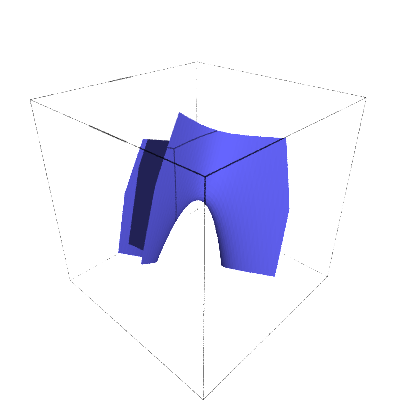

In [97]:
fig.rotate((1,1,1),pi/4).show(figsize=4)

**Parte 5. Curvas en el espacio.** 

Se manejan de forma similar a las curvas en el plano. La diferencia es que para visualizarlas hay que utilizar el procedimiento *.show_(viewer='tachyon')* sobre la figura generada con *parametric_plot* o *parametric_plot3d* (existe esa instrucción, específica para curvas en el espacio).

**Ejercicio 9.-** Una helice circular de radio $a$ y pendiente $b/a$ (o paso $2\pi b$) se expresa en coordenadas paramétricas mediante
$$
x(t)=a\cos t,\ y(t)=a\operatorname{sen} t,\ z(t)=bt.
$$
Representa la hélice circular de radio 1 y paso $\pi/5$  con $t$ entre $0$ y $5$ y calcula su longitud. Calcula la recta tangente a la curva en tiempo $t=\pi$ y representala junto con la hélice. 

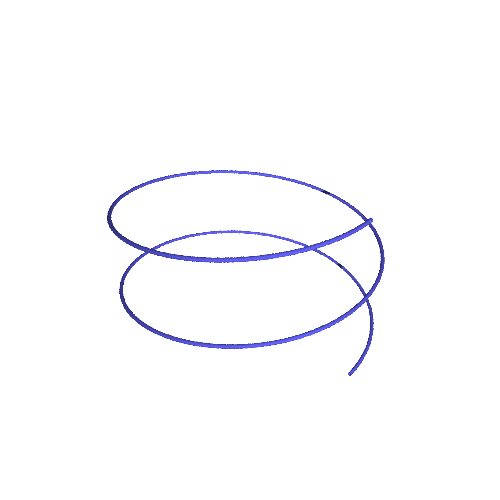

In [106]:
a=1
helice(t) = (a*cos(t),a*sin(t),t/10)
parametric_plot(helice, (t,0,4*pi),plot_points=1000,thickness=3,frame=False).show(viewer='tachyon')

**Parte 6. Superficies en el espacio.** 

Para representar superficies tenemos las opciones siguientes:

- Gráficas de funciones de dos variables.
- Conjuntos de nivel de funciones de dos o tres variables.
- Superficies parametrizadas $ (x(t,s),y(t,s),z(t,s))$, $(t,s) \in D \subset \mathbb{R}^2 $. (*Esta tercera opción tiene un papel fundamental a la hora de calcular integrales sobre superficies*.)

Las instrucciones de SAGE que hay que utilizar para representar superficies dadas como gráficas o conjuntos de nivel son:
- *plot3d*,
- *implicit_plot3d*,
- *parametric_plot3d*.

In [ ]:
#mira las páginas de ayuda de esos comandos

<p><span style="font-size: large;">Veamos algún ejemplo.</span></p>

In [ ]:
#EJEMPLO DE GRÁFICA DE UNA FUNCIÓN DE 2 VARIABLES

reset()
var('x y')
f=cos(x**2 +y**2)

plot3d(f,(x,-3,3),(y,-3,3)).show(viewer='tachyon')

In [ ]:
#PARA COMPARAR, USAMOS CONJUNTOS DE NIVEL EN 2 VARIABLES

contour_plot(f,(x,-3,3),(y,-3,3)).show()
implicit_plot(f,(x,-3,3),(y,-3,3),contours=10).show()

In [ ]:
#EJEMPLO DE SUPERFICIES DE NIVEL EN 3 VARIABLES.

reset()
var('x y z')
f=x**2 +y**2+z**2-4

implicit_plot3d(f,(x,-3,3),(y,-3,3), (z,-3,3)).show(viewer='tachyon')

In [ ]:
# Un paraboloide parametrizado
u, v = var('u,v')
parametric_plot3d([u*cos(v), u*sin(v), u^2], (u,0,1), (v,0,2*pi+0.4), plot_points=[50,50]).show(viewer='tachyon')


**Ejercicio 10.-** Usa los comandos anteriores en otros ejemplos de tu elección (una buena idea es incluir el *paraboloide hiperbólico* o *silla de montar*).

**Ejercicio 11.-** Explica qué es lo que hace el siguiente código.

Animation with 13 frames
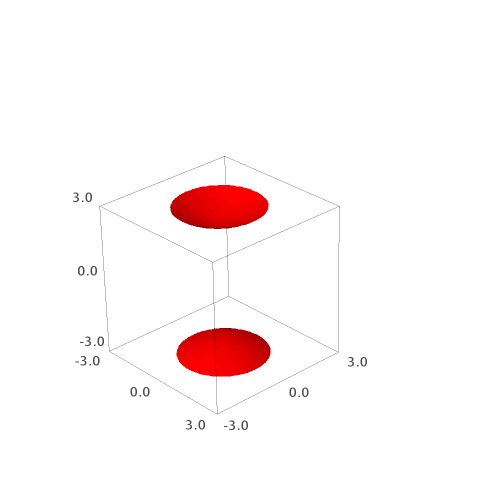

In [107]:
var('x y z')
peli=[]
for k in [-6..6]:
    peli.append(implicit_plot3d(x^2+y^2-z^2==k, (x, -3, 3), (y, -3,3), (z, -3,3), color=(abs(k)/6,0,1-abs(k)/6)))
movie=animate(peli)
movie.show(delay=50)

**Parte 7. Derivadas parciales. Planos tangentes.**

Calcular derivadas parciales es fácil.

In [115]:
f(x, y) = x^2 + x*y + y^2 - 6*x + 2
fx(x,y)= f.diff(x)
fy(x,y) = f.diff(y)
show(fx)
show(fy)

(x, y) |--> 2*x + y - 6

(x, y) |--> x + 2*y

In [116]:
show(f.gradient())
show(f.hessian())

(x, y) |--> (2*x + y - 6, x + 2*y)

[(x, y) |--> 2 (x, y) |--> 1]
[(x, y) |--> 1 (x, y) |--> 2]

Se pueden calcular gradientes con la instrucción *gradient* y hessianos con la instrucción *hessian*.

**Ejercicio 12.-** Demuestra con la ayuda de Sage que la función $f$ del ejemplo tiene un mínimo en el punto $(4,-2)$.

**Ejercicio 13.-** Comprueba que el límite de la función 
$$
f(x,y)=\begin{cases}\frac{xy^3}{x^2+y^6}&\text{si }(x,y)\neq(0,0),\\
0&\text{si }(x,y)=(0,0),
\end{cases}
$$
cuando $(x,y)$ tiende a $(0,0)$ a lo largo de rectas es 0, y que sin embargo, cuando nos acercamos a lo largo de la curva $x=y^3$ el límite es $1/2$. Representa la función gráficamente.

In [113]:
var('x y r')
f(x,y)=x*y^3/(x^2+y^6)
limit(f(x, r*x), x=0)

0

In [114]:
limit(f(x^3, x), x=0)

1/2

**Ejercicio 14.-** Calcula el plano tangente a la gráfica de la función $f(x,y)=x^2+y^4+e^{xy}$ en el punto $(1,0,2)$. Representa simultáneamente la gráfica de la función y dicho plano tangente. 

**Ejercicio 15.-** Es fácil comprobar que si la gráfica de la función 
$$
f(x,y)=\begin{cases}\frac{xy}{\sqrt{x^2+y^2}}&\text{si }(x,y)\neq(0,0),\\
0&\text{si }(x,y)=(0,0),
\end{cases}
$$
tiene un plano tangente en $(0,0,0)$, este tiene que ser el plano $z=0$. Dibuja simultáneamente la gráfica de la función y el plano $z=0$. ¿Dirías que la función es diferenciable en $(0,0)$?